**Problem Statement**

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
 
Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
com=pd.read_csv("Company_Data.csv")
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
#There are 3 categorical features
categorical_features=[feature for feature in com.columns if com[feature].dtypes == 'O']
print("Categorical Features are:",categorical_features)

Categorical Features are: ['ShelveLoc', 'Urban', 'US']


In [ ]:
#Numeric Features
numeric_features=[feature for feature in com.columns if com[feature].dtypes !='O']
print("Numeric Features are:",numeric_features)

Numeric Features are: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


**Feature Engineering**

Sales feature's values can be converted into a categorical column by dividing the maximum value of sales by 3(If we plan on making 3 sales devisions good, medium and bad).

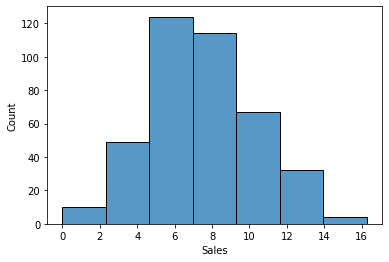

In [ ]:
sns.histplot(com.Sales,bins=7)

In [ ]:
com.Sales.max()/3

5.423333333333333

In [ ]:
com1=com.copy()
com1['Sales_category']=pd.cut(x=com1['Sales'],bins=[0,5.5,11,17],labels=['Low','Medium','High'],right=False)
com1=com1.drop(columns=['Sales'])
com1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


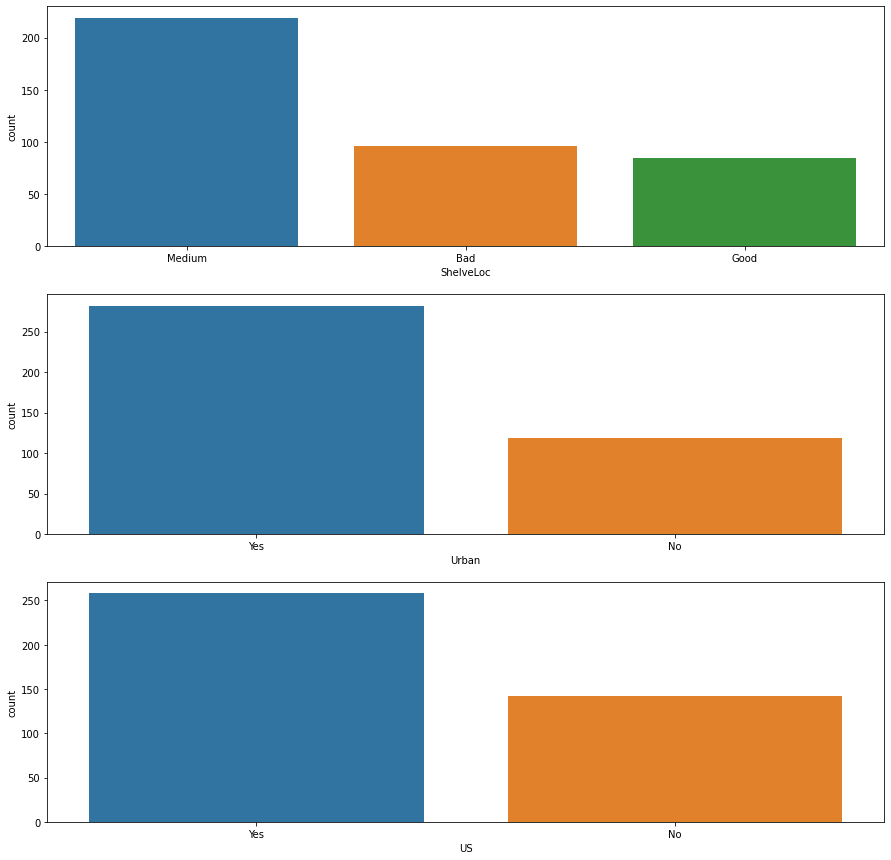

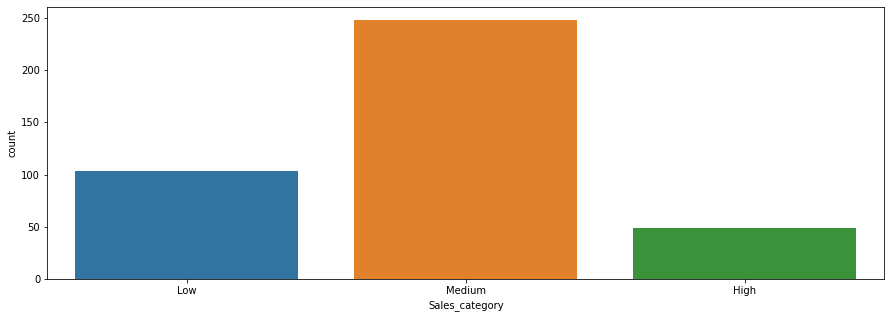

In [ ]:
#Bar plot for categorical features
fig,axes=plt.subplots(len(categorical_features),1,figsize=(15,15))

for i in range (0, len(categorical_features)):
    sns.countplot(com[categorical_features[i]],ax=axes[i],order=com[categorical_features[i]].value_counts().index)

plt.figure(figsize=(15,5))
sns.countplot(com1['Sales_category'])

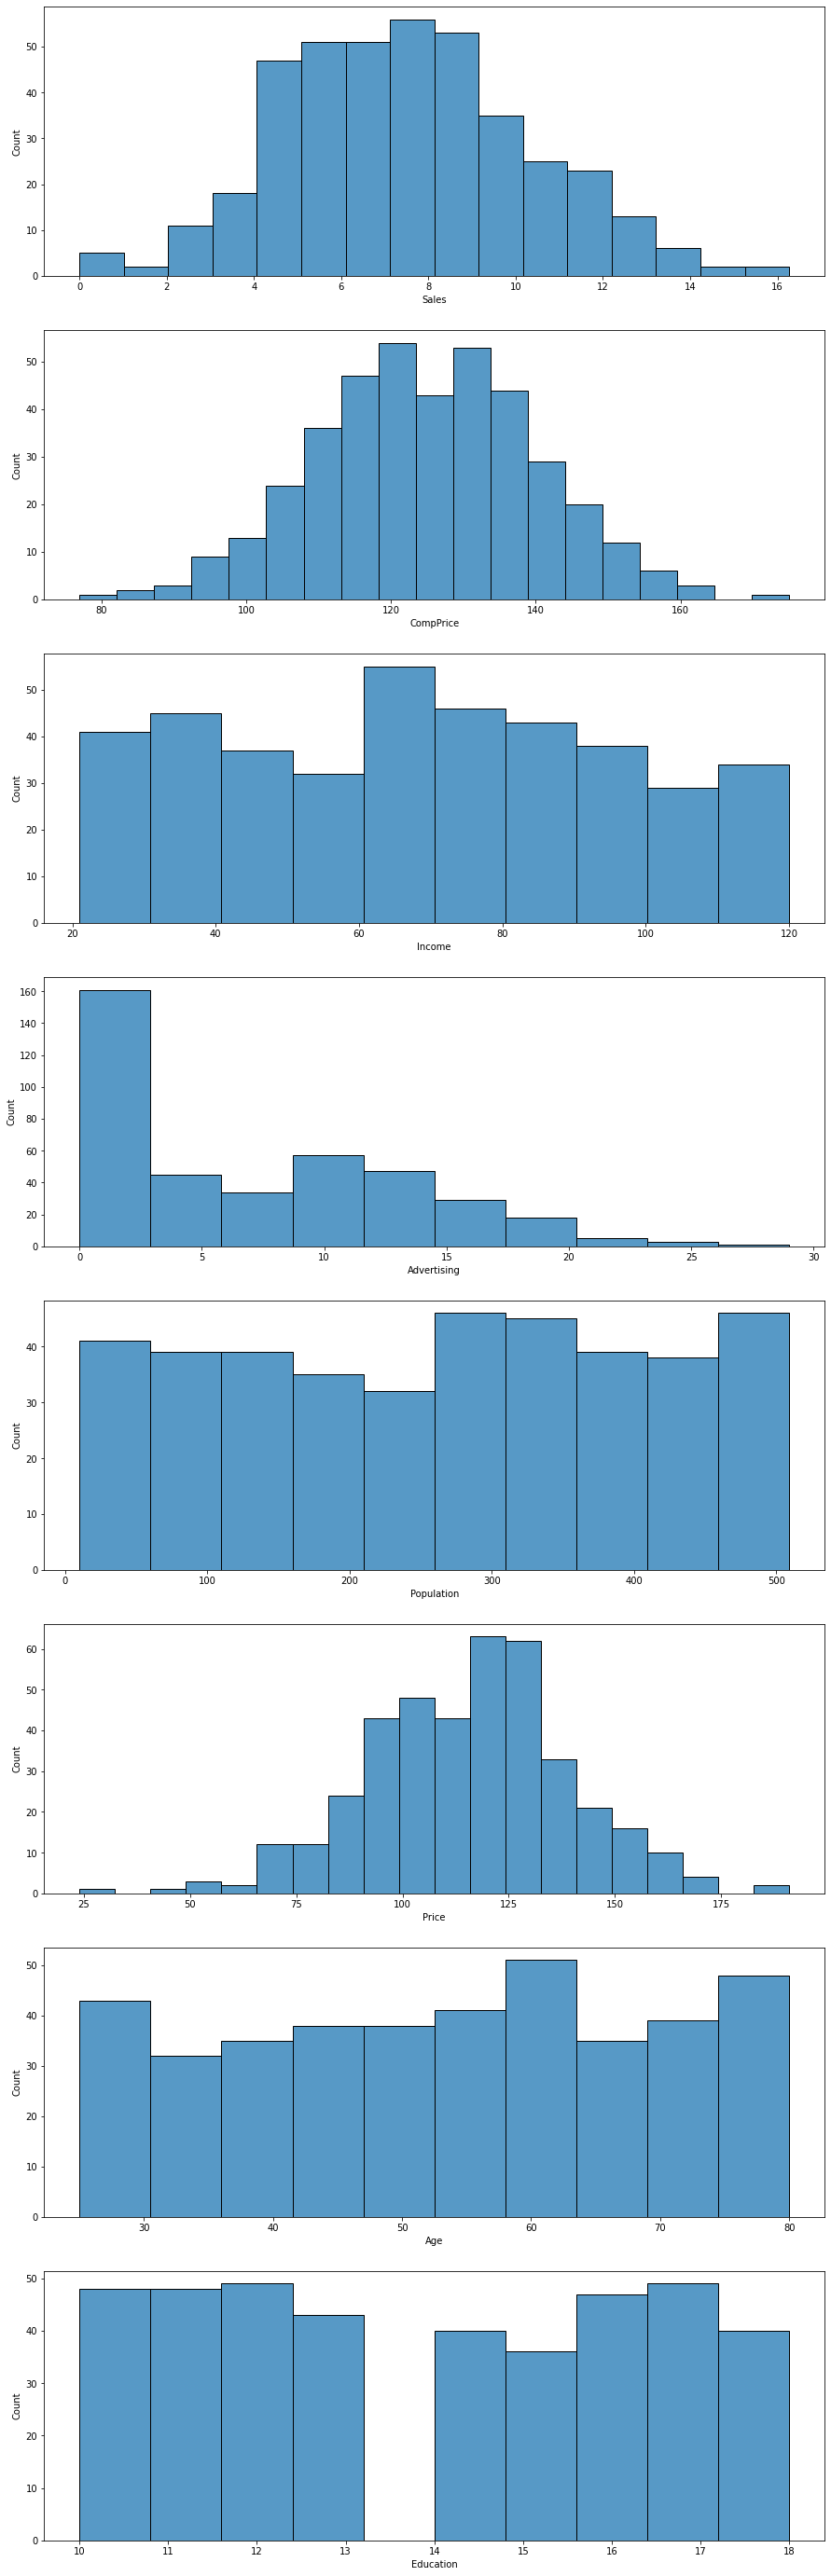

In [ ]:
#Histogram for Numerical Features
fig,axes=plt.subplots(len(numeric_features),1,figsize=(15,50))

for i in range(0,len(numeric_features)):
  sns.histplot(com[numeric_features[i]],ax=axes[i])

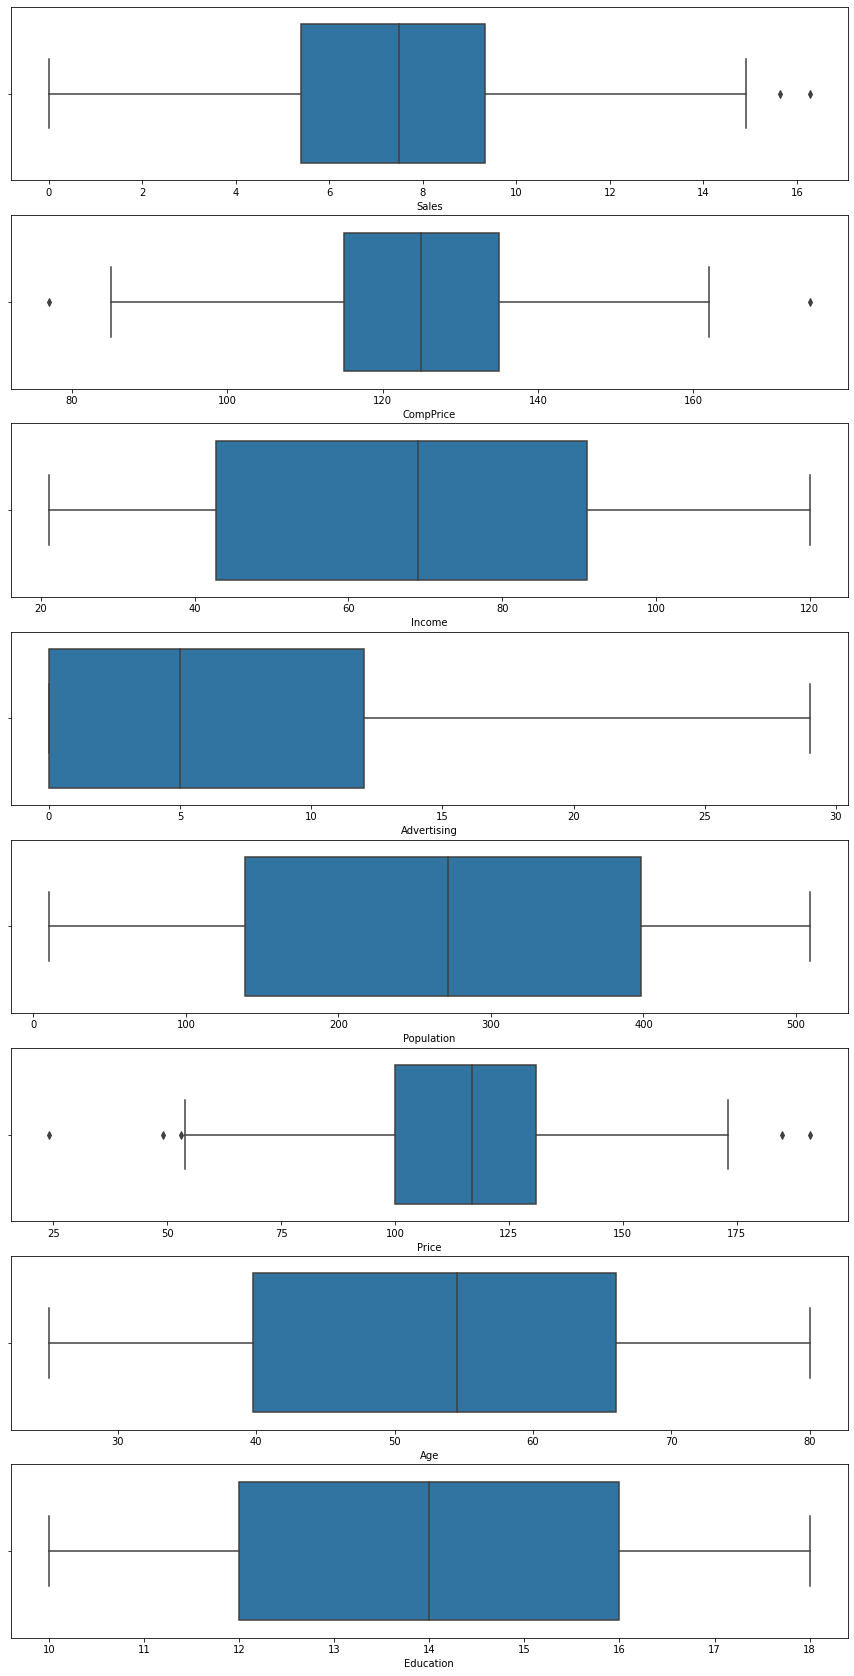

In [ ]:
#Box plot for outlier detection
fig,axes=plt.subplots(len(numeric_features),1,figsize=(15,30))

for i in range (0,len(numeric_features)):
    sns.boxplot(com[numeric_features[i]],ax=axes[i])

In [ ]:
com2=com1.copy()

for feature in numeric_features:
    Q1,Q3=np.percentile(com[feature],[25,75])
    IQR=Q3-Q1
    ul=Q3+1.5*IQR
    ll=Q1-1.5*IQR
    outliers=com[feature][(com[feature]<ll)|(com[feature]>ul)]
    
    com2=com2.drop(outliers.index[:],errors="ignore")
    
    outliers=0 

In [ ]:
com1.shape

(400, 11)

In [ ]:
com2.shape

(392, 11)

8 Outliers are dropped

**Data Pre-Processing**

In [ ]:
y=com2['Sales_category']
x=com2.drop(['Sales_category'],axis=1)

In [ ]:
#Encoding input categorical features
x=pd.get_dummies(x)

In [ ]:
#Encoding output categorical features
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
#Splitting the data into Traing & Testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (313, 14)
Shape of X_test:  (79, 14)
Shape of y_train:  (313,)
Shape of y_test:  (79,)


**Feature Extraction**

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)

In [ ]:
scores=fit.scores_
features=fit.transform(x)

In [ ]:
score_df=pd.DataFrame(list(zip(scores,x.columns)),
                      columns=['Score','Feature'])
score_df.sort_values(by='Score',ascending=False,inplace=True)
score_df

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


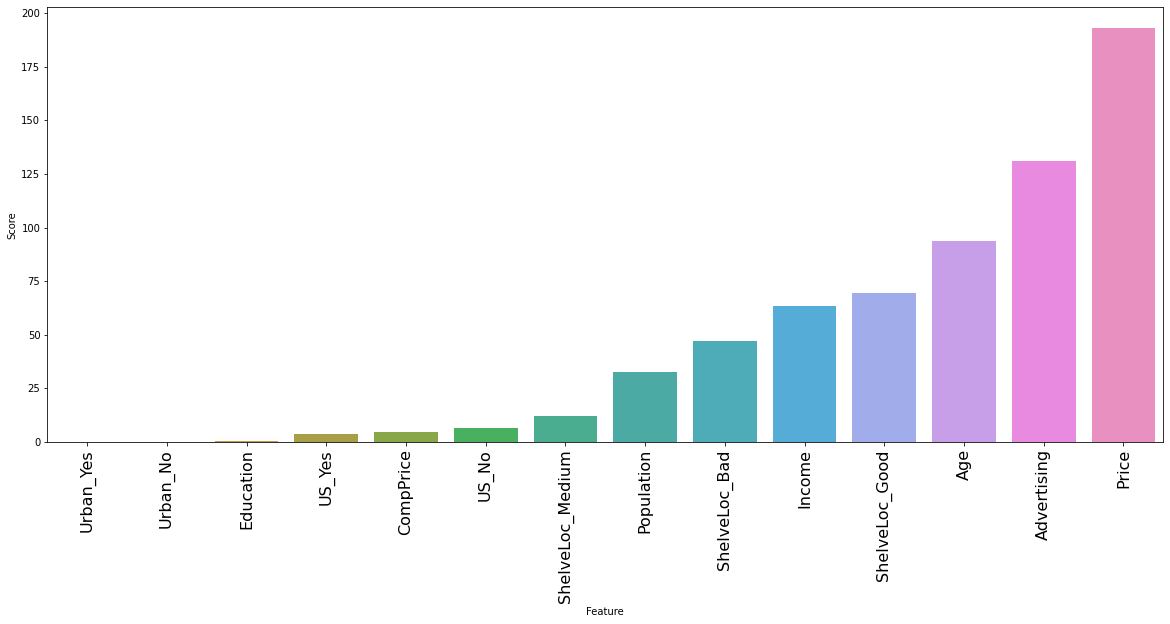

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature',y="Score",data=score_df,order=score_df.sort_values('Score').Feature)
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [ ]:
model_com_x=x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium','US_No','CompPrice']]
model_com_x

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [ ]:
model_com_y=y
model_com_y[:5]

array([2, 0, 2, 2, 1])

**Building Random Forest Classifier**

In [31]:
num_trees=100
max_features=3

kfold=KFold(n_splits=10,random_state=7,shuffle=True)

model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,model_com_x,model_com_y,cv=kfold)

print('Batchwise accuracy is:','\n',results,'\n')
print('Overall accuracy is:',results.mean())

Batchwise accuracy is: 
 [0.675      0.6        0.71794872 0.71794872 0.74358974 0.61538462
 0.74358974 0.79487179 0.69230769 0.74358974] 

Overall accuracy is: 0.7044230769230768


Grid search for hyper parameter tuning

In [32]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid=GridSearchCV(rf,param_grid=param_dict,cv=kfold)
grid.fit(model_com_x,model_com_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [33]:
print(grid.best_score_)
print(grid.best_params_)

0.7248076923076923
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 125}


Building final model based on grid.best_params_

In [34]:
model_kf=grid.best_estimator_
model_kf.fit(model_com_x,model_com_y)

results = cross_val_score(model_kf,model_com_x,model_com_y,cv=kfold)
print('Accuracy with K-Fold validation is:',np.round(results.mean(),3)) 

Accuracy with K-Fold validation is: 0.725


In [35]:
model = grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with Train Test Split:',accuracy_score(y_test,pred))

Accuracy with Train Test Split: 0.7244897959183674


In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.68      0.50      0.58        26
           2       0.74      0.89      0.81        63

    accuracy                           0.72        98
   macro avg       0.70      0.54      0.57        98
weighted avg       0.72      0.72      0.70        98



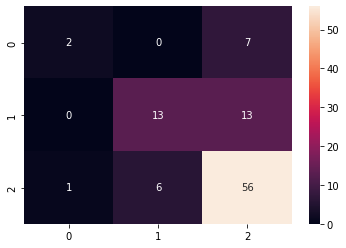

In [37]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True);